<a href="https://colab.research.google.com/github/ssarker21/Introduction-to-Machine-Learning/blob/main/Homework4_Problem1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Results (80/20) ===
             Accuracy  Precision  Recall
Model                                   
LogisticReg    0.9825     0.9861  0.9861
SVM-Linear     0.9737     0.9859  0.9722
SVM-Poly       0.9123     0.8780  1.0000
SVM-RBF        0.9825     0.9861  0.9861
SVM-Sigmoid    0.9298     0.9571  0.9306


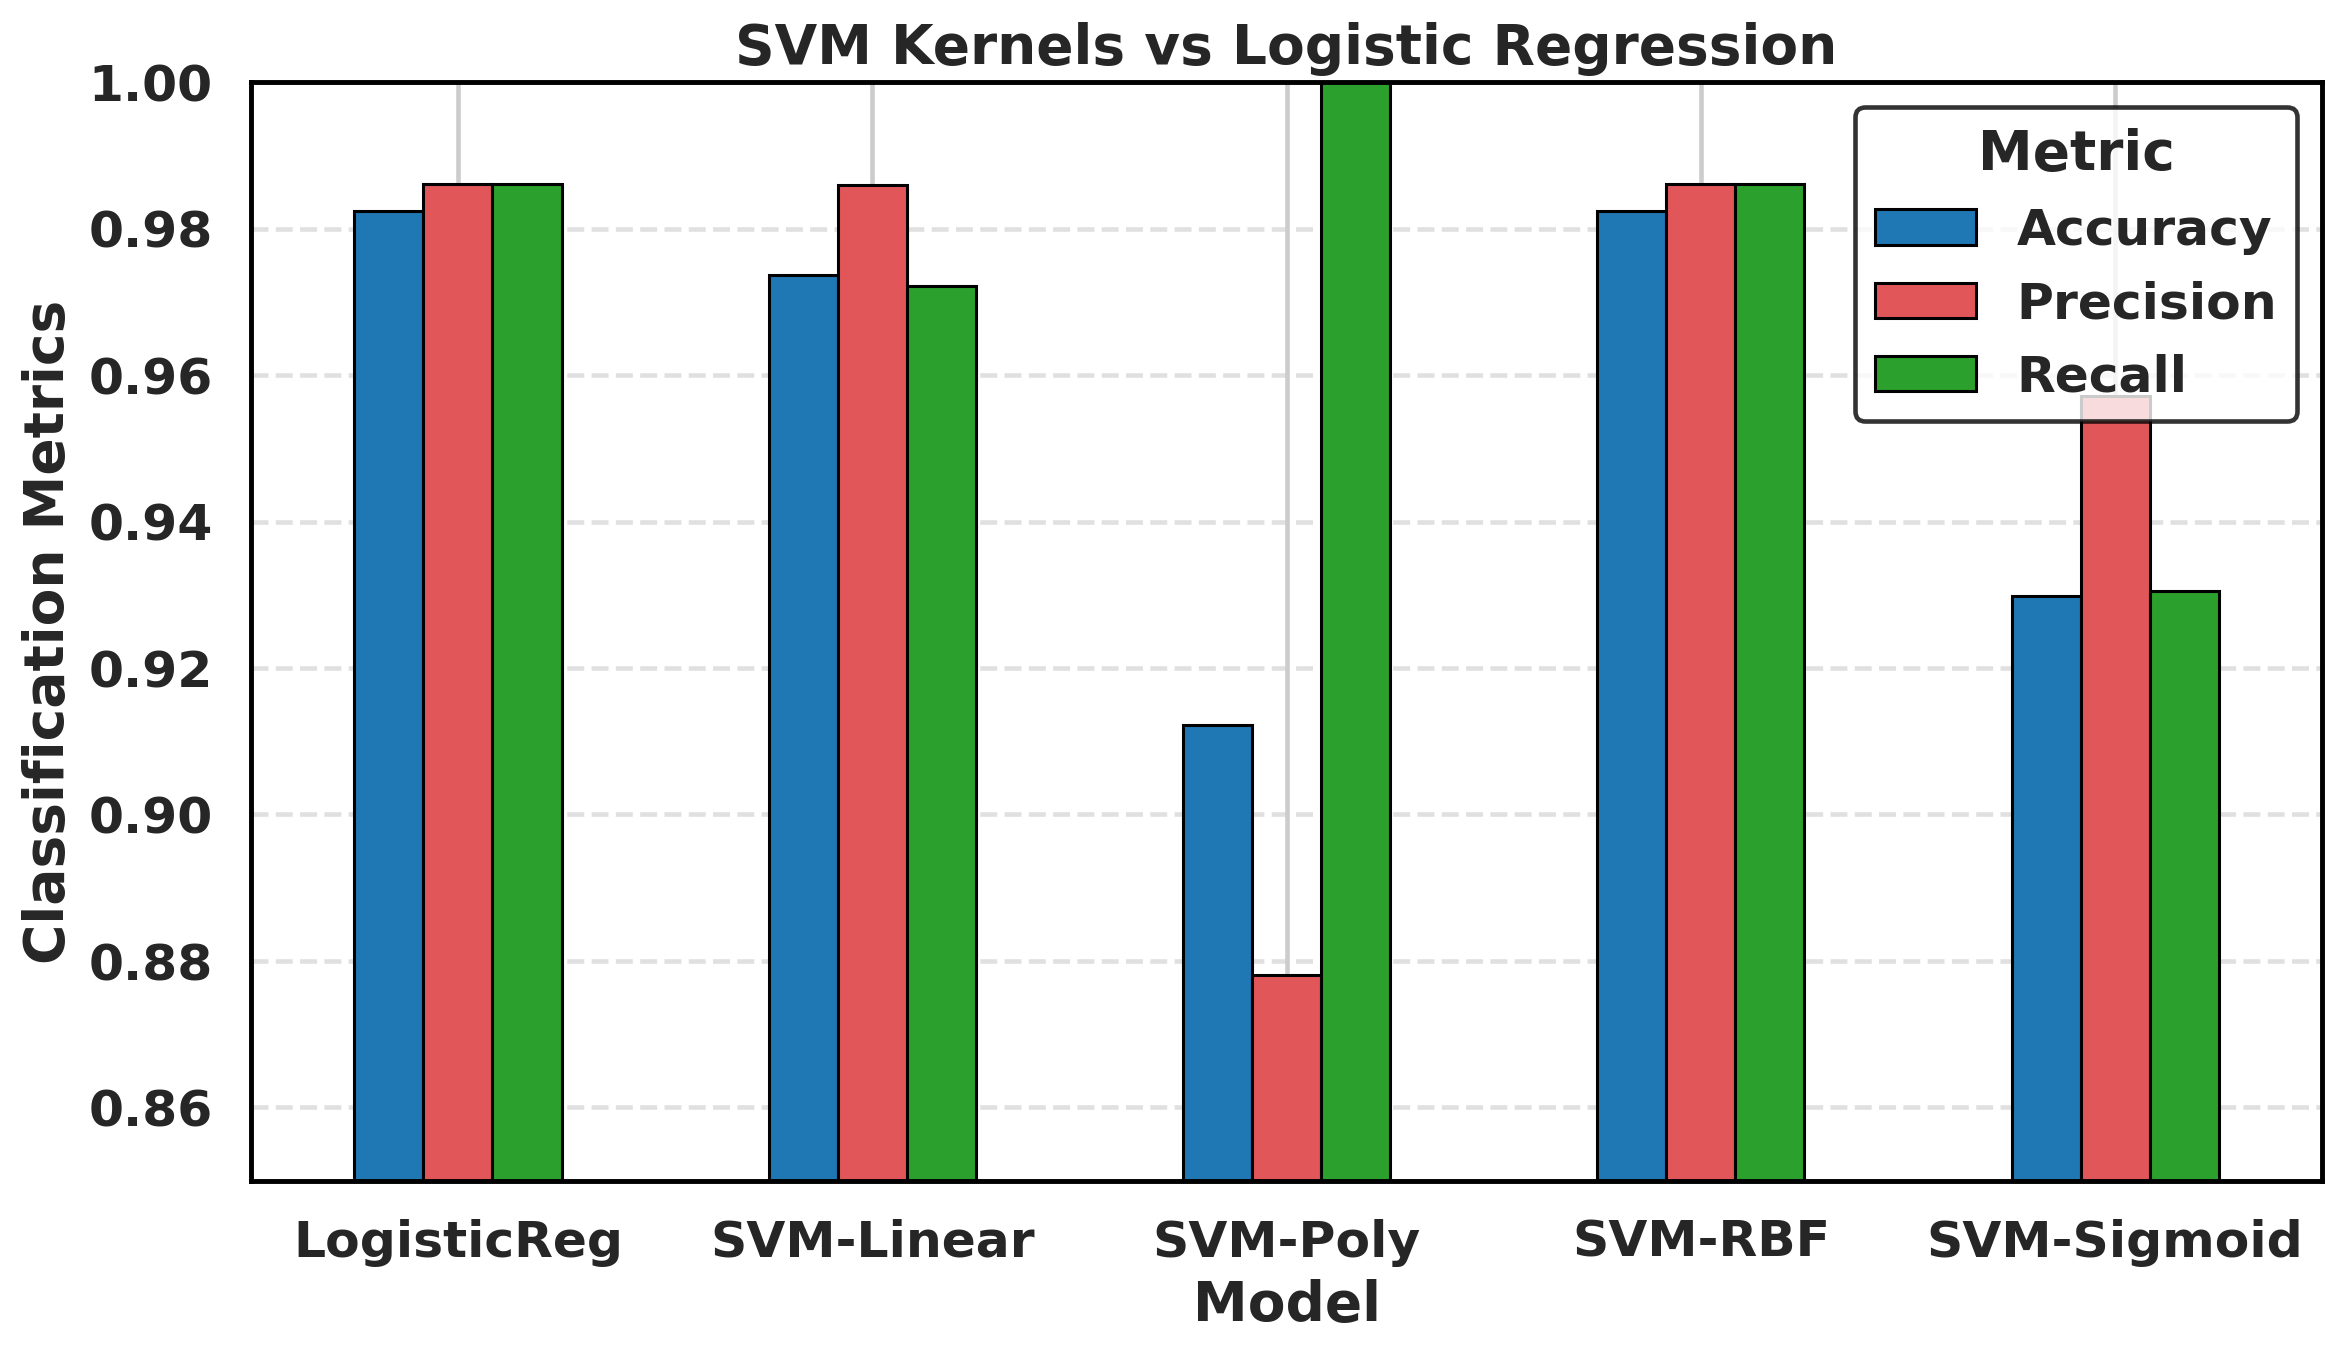

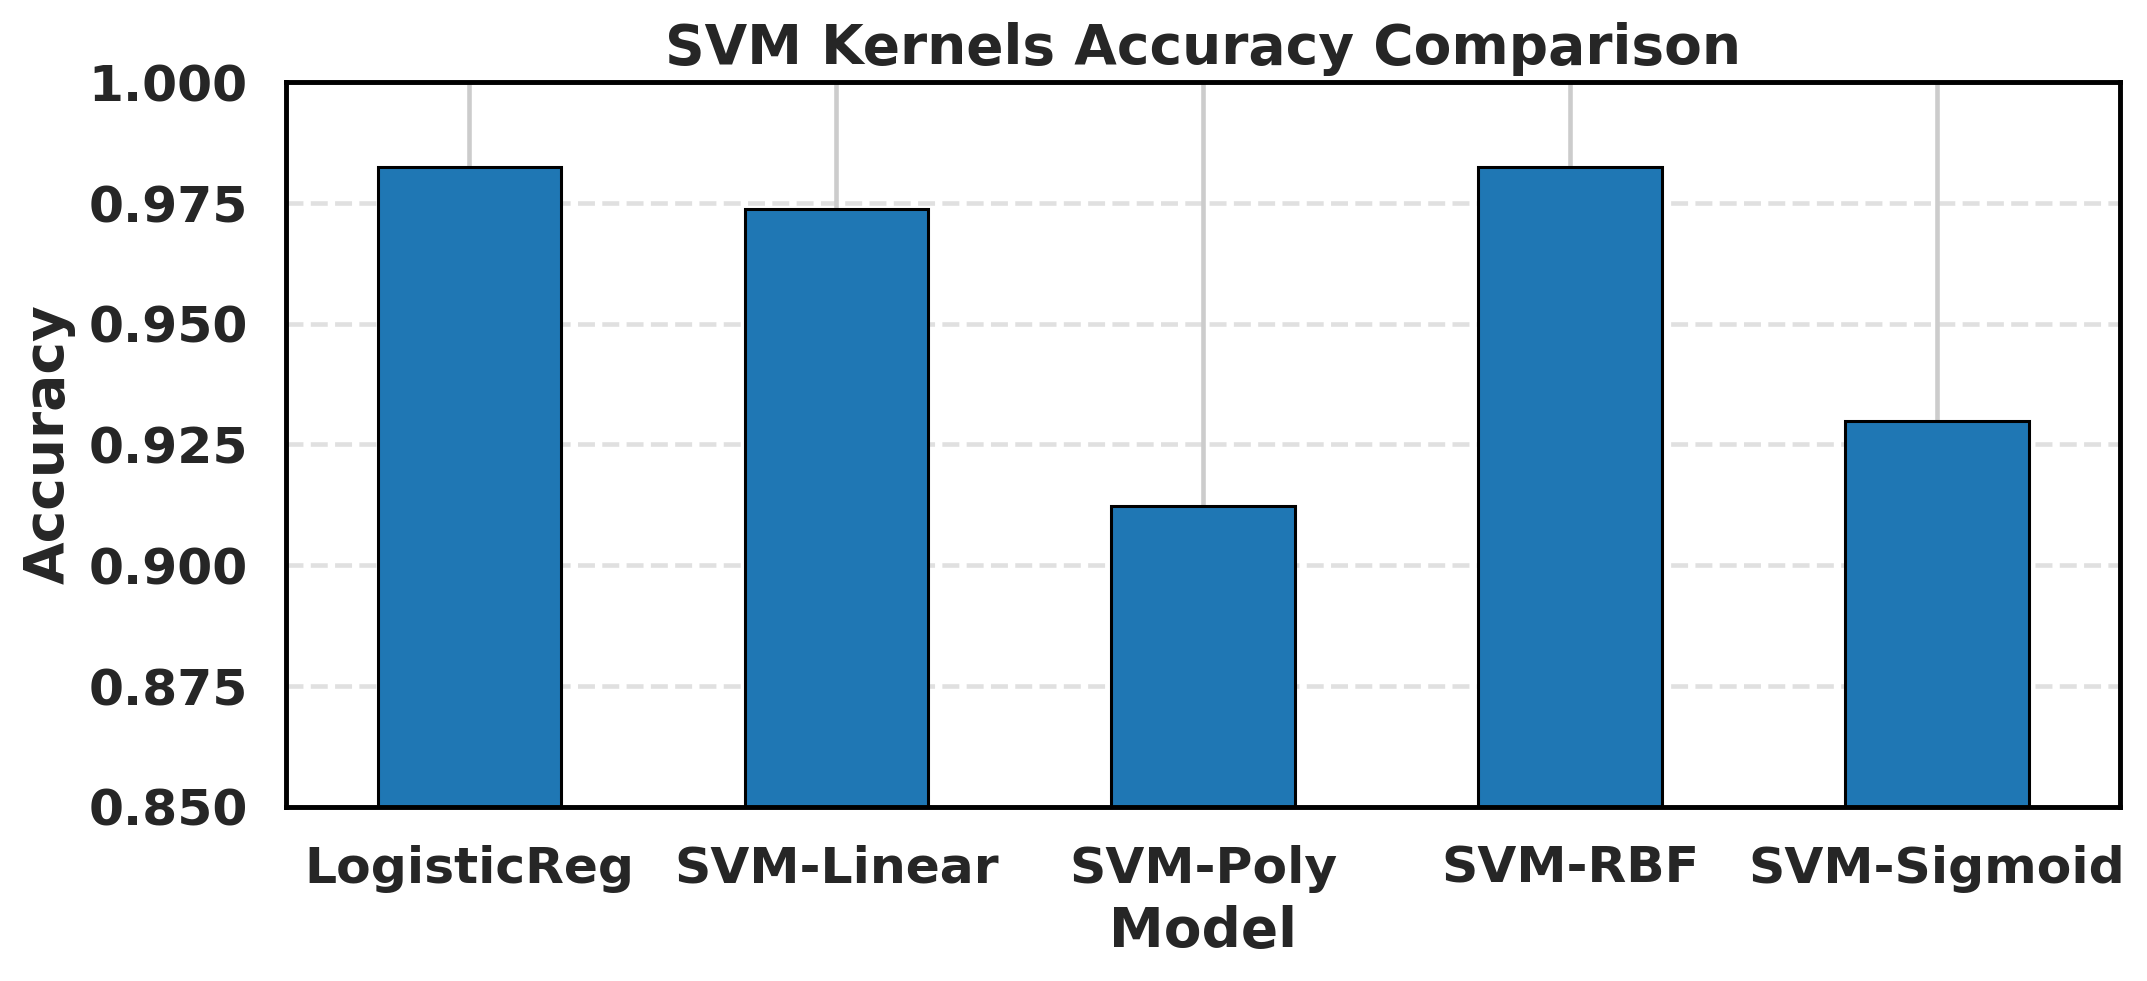

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Bold, high-contrast theme
sns.set_style("whitegrid")
sns.set_context("talk")  # larger fonts
plt.rcParams.update({
    "figure.dpi": 200,          # on-screen resolution
    "savefig.dpi": 300,         # resolution when saving
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titleweight": "bold",
    "axes.edgecolor": "black",
    "axes.linewidth": 1.6,
    "xtick.major.width": 1.6,
    "ytick.major.width": 1.6,
    "legend.edgecolor": "black",
})

# Custom palette (Accuracy, Precision, Recall)
metric_colors = ["#1f77b4", "#e15759", "#2ca02c"]  # blue / red / green

# 1) Load the dataset
data = datasets.load_breast_cancer()
X = data.data                  # all 30 features
y = data.target                # target: 0 = malignant, 1 = benign

# 2) Train–test split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 3) Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# 4) Define models to compare
models = {
    "SVM-Linear":  SVC(kernel="linear", C=1.0, random_state=42),
    "SVM-Poly":    SVC(kernel="poly",   C=1.0, degree=3, gamma="scale", random_state=42),
    "SVM-RBF":     SVC(kernel="rbf",    C=1.0, gamma="scale", random_state=42),
    "SVM-Sigmoid": SVC(kernel="sigmoid",C=1.0, gamma="scale", random_state=42),
    "LogisticReg": LogisticRegression(max_iter=5000, random_state=42)
}

# 5) Train, predict, and collect metrics
rows = []
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rows.append({
        "Model": name,
        "Accuracy":  accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),  # positive class = benign (label 1)
        "Recall":    recall_score(y_test, y_pred)
    })

df_results = pd.DataFrame(rows).set_index("Model").sort_index()
print("=== Results (80/20) ===")
print(df_results.round(4))

# 6) Plot: Accuracy, Precision, Recall per model (hi-res, bold)
fig, ax = plt.subplots(figsize=(11, 6.5), dpi=220)
df_results.plot(
    kind="bar",
    ax=ax,
    color=metric_colors,
    edgecolor="black",
    linewidth=1.0,
)
ax.set_title("SVM Kernels vs Logistic Regression")
ax.set_ylabel("Classification Metrics")
ax.set_ylim(0.85, 1.0)
ax.tick_params(axis="x", labelrotation=0, width=1.6)
ax.tick_params(axis="y", width=1.6)
ax.grid(axis='y', linestyle='--', alpha=0.6)
leg = ax.legend(title="Metric", frameon=True)
leg.set_title("Metric")
for txt in leg.get_texts():
    txt.set_fontweight("bold")
plt.tight_layout()
# Optional: save figure
plt.savefig("svm_metrics_breast_cancer.png", bbox_inches="tight")
plt.show()

# 7) Accuracy-only comparison (hi-res, bold)
fig, ax = plt.subplots(figsize=(10, 4.8), dpi=220)
df_results["Accuracy"].plot(
    kind="bar",
    ax=ax,
    color="#1f77b4",
    edgecolor="black",
    linewidth=1.0,
)
ax.set_title("SVM Kernels Accuracy Comparison")
ax.set_ylabel("Accuracy")
ax.set_ylim(0.85, 1.0)
ax.tick_params(axis="x", labelrotation=0, width=1.6)
ax.tick_params(axis="y", width=1.6)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
# Optional: save figure
plt.savefig("accuracy_comparison_breast_cancer.png", bbox_inches="tight")
plt.show()
